In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import xarray 
import os
from math import *
import numpy as np
from scipy.stats import linregress

In [2]:
file_path="/net/kryo/work/public/shared/AtlantECO/BASE/AtlantECO-BASE-v1_microbiome_traditional_Copepoda_abund+biomass_20221220.csv" #data access BIOMASS+abondance Copepod

df = pd.read_csv(file_path, encoding='ISO-8859-1') #Open data

species_counts = df['Species'].value_counts() # count the number of observation for each species
species_counts

/tmp/ipykernel_37508/3347805593.py:3: DtypeWarning: Columns (8,12,15,16,25,26,35,38,41,50,51,52,53,54,57,64,78,79,80,81,83) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ISO-8859-1') #Open data


Species
Metridia lucens              106398
Calanus finmarchicus          96651
Rhincalanus gigas             78377
Oncaea venusta                74670
Nannocalanus minor            71041
                              ...  
Cyclopina norvegica               1
Oithona hebes                     1
Cyclopinoides longicornis         1
Calocalanus longifurca            1
Amallothrix polaris               1
Name: count, Length: 693, dtype: int64

In [19]:
df.keys()

Index(['Unnamed: 0', 'ProjectID', 'ProjectWP', 'DataSilo', 'ContactName',
       'ContactAdress', 'occurrenceID', 'orig_occurrenceID', 'DatasetKey',
       'decimalLatitude', 'decimalLongitude', 'geodeticDatum',
       'CoordUncertainty', 'CountryCode', 'eventDate', 'eventDateInterval',
       'eventDateIntervalUnit', 'Year', 'Month', 'Day', 'Bathymetry',
       'BathySource', 'HabitatType', 'LonghurstProvince', 'Depth',
       'DepthAccuracy', 'DepthIntegral', 'MinDepth', 'MaxDepth', 'MeanDepth',
       'BinningDepth', 'WOA_18_DepthLevel', 'WOA_18_DepthLevelLowerBound',
       'WOA_18_DepthLevelUpperBound', 'ParentEventID', 'EventID',
       'InstitutionCode', 'SourceArchive', 'OrigCollectionCode',
       'OrigCollectionID', 'BiblioCitation', 'CitationDOI', 'DateDataAccess',
       'OrigScientificName', 'WoRMS_ID', 'WoRMS_status', 'Group', 'Kingdom',
       'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'Subspecies',
       'ScientificName', 'TaxonRank', 'LifeForm', 'AssocT

# Data preparation (Depth=MaxDepth if Depth=NaN; No CPR Data)

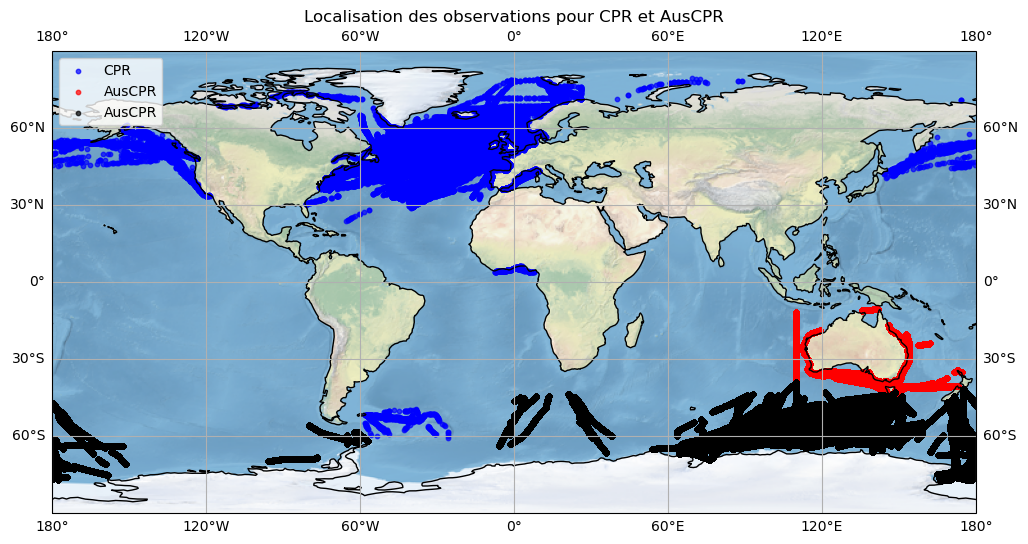

In [20]:
##___Location of CPR Data

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

df.loc[:, 'LATITUDE'] = pd.to_numeric(df['decimalLatitude'], errors='coerce')  # Utilisation de .loc pour éviter le warning
df.loc[:, 'LONGITDE'] = pd.to_numeric(df['decimalLongitude'], errors='coerce')  # Utilisation de .loc pour éviter le warning

# Filtrer le DataFrame pour les ParentEventID 'CPR' et 'AusCPR'
cpr_data = df[df['ParentEventID'] == 'CPR']
auscpr_data = df[df['ParentEventID'] == 'AusCPR']
c=df[df['SamplingProtocol'] == 'CPR is towed behind ships and collects samples from 10m depth; 1.27cm2 aperture; water speed 0.2 m/s; silk mesh of 270 Î¼m; collecting sink covered and rolled into a preservation tank containing formaldehyde']

# Création de la figure et de l'axe avec Cartopy
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()

# Tracer les points de données pour 'CPR'
plt.scatter(cpr_data['LONGITDE'], cpr_data['LATITUDE'],
            color='blue', s=10, alpha=0.7, label='CPR', transform=ccrs.PlateCarree())

# Tracer les points de données pour 'AusCPR'
plt.scatter(auscpr_data['LONGITDE'], auscpr_data['LATITUDE'], 
            color='red', s=10, alpha=0.7, label='AusCPR', transform=ccrs.PlateCarree())

plt.scatter(c['LONGITDE'], c['LATITUDE'], 
            color='black', s=10, alpha=0.7, label='AusCPR', transform=ccrs.PlateCarree())

# Ajouter une légende
plt.legend()

# Ajouter des grilles et des labels
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Ajouter un titre
plt.title('Localisation des observations pour CPR et AusCPR')

# Afficher le graphique
plt.show()

In [21]:
##__df_filtered_withoutPCR if we want data without CPRData

# Créer un nouveau DataFrame en excluant les lignes où ParentEventID est 'CPR' ou 'AusCPR'
import pandas as pd

# Supposons que df est votre DataFrame original

# Filtrer le DataFrame en excluant certaines conditions
df_filtered_withoutPCR = df[
    ~(
        df['ParentEventID'].isin(['CPR', 'AusCPR']) |
        (df['SamplingProtocol'] == 'CPR is towed behind ships and collects samples from 10m depth; 1.27cm2 aperture; water speed 0.2 m/s; silk mesh of 270 Î¼m; collecting sink covered and rolled into a preservation tank containing formaldehyde')
    )
]

# Calcul du nombre total d'observations supprimées
total_removed = len(df) - len(df_filtered_withoutPCR)
print(f'Total des observations supprimées: {total_removed}')

# Calculer le nombre d'observations supprimées pour chaque 'ParentEventID'
parent_event_id_removed = len(df[df['ParentEventID'].isin(['CPR', 'AusCPR'])])
print(f'Observations supprimées où ParentEventID est CPR ou AusCPR: {parent_event_id_removed}')

# Calculer le nombre d'observations supprimées pour 'SamplingProtocol'
sampling_protocol_removed = len(df[df['SamplingProtocol'] == 'CPR is towed behind ships and collects samples from 10m depth; 1.27cm2 aperture; water speed 0.2 m/s; silk mesh of 270 Î¼m; collecting sink covered and rolled into a preservation tank containing formaldehyde'])
print(f'Observations supprimées où SamplingProtocol est spécifique: {sampling_protocol_removed}')

# Noter que ces comptages peuvent inclure des recoupements où les deux conditions sont vraies pour certaines observations.

Total des observations supprimées: 8511548
Observations supprimées où ParentEventID est CPR ou AusCPR: 2636167
Observations supprimées où SamplingProtocol est spécifique: 5875381


In [22]:
###___ Replace "Depth" by "MaxDepth" if Depth=NaN

import pandas as pd
import numpy as np

# Supposons que df_test est votre DataFrame et contient déjà les colonnes 'Depth' et 'MaxDepth'

# Créer la colonne 'DepthOrigin' comme une copie de la colonne 'Depth'
df_filtered_withoutPCR['DepthOrigin'] = df_filtered_withoutPCR['Depth'].copy()

# Mettre à jour la colonne 'Depth' pour utiliser 'MaxDepth' lorsque 'Depth' est NaN
df_filtered_withoutPCR['Depth'] = np.where(df_filtered_withoutPCR['Depth'].isna(), df_filtered_withoutPCR['MaxDepth'], df_filtered_withoutPCR['Depth'])

# Afficher les premières lignes pour vérifier les modifications
df_filtered_withoutPCR

/tmp/ipykernel_37508/3645253324.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_withoutPCR['DepthOrigin'] = df_filtered_withoutPCR['Depth'].copy()
/tmp/ipykernel_37508/3645253324.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_withoutPCR['Depth'] = np.where(df_filtered_withoutPCR['Depth'].isna(), df_filtered_withoutPCR['MaxDepth'], df_filtered_withoutPCR['Depth'])


,Unnamed: 0,ProjectID,ProjectWP,DataSilo,ContactName,ContactAdress,occurrenceID,orig_occurrenceID,DatasetKey,decimalLatitude,...,SampleAmount,SampleAmountUnit,SampleEffort,DeterminedBy,DeterminedDate,Note,Flag,LATITUDE,LONGITDE,DepthOrigin
0,1,AtlantECO_H2020_GA#862923,WP2,Traditional_microscopy,Fabio_Benedetti;Meike_Vogt,fabio.benedetti@usys.ethz.ch;meike.vogt@env.et...,-41.02_-22.43_11_6_1995_23.8_Copepoda_423.025,0001_0005,4212000,-22.430000,...,27.894336 m3,See SampleAmount,NaN,NaN,NaN,NaN,NaN,-22.430000,-41.020000,NaN
1,2,AtlantECO_H2020_GA#862923,WP2,Traditional_microscopy,Fabio_Benedetti;Meike_Vogt,fabio.benedetti@usys.ethz.ch;meike.vogt@env.et...,-41.08_-23.35_12_6_1995_110.3_Copepoda_891.2492,0002_0005,4212000,-23.350000,...,85.486760 m3,See SampleAmount,NaN,NaN,NaN,NaN,NaN,-23.350000,-41.080000,NaN
2,3,AtlantECO_H2020_GA#862923,WP2,Traditional_microscopy,Fabio_Benedetti;Meike_Vogt,fabio.benedetti@usys.ethz.ch;meike.vogt@env.et...,-41.1_-23.77_12_6_1995_210.7_Copepoda_217.2703,0003_0005,4212000,-23.770000,...,336.90756 m3,See SampleAmount,NaN,NaN,NaN,NaN,NaN,-23.770000,-41.100000,NaN
3,4,AtlantECO_H2020_GA#862923,WP2,Traditional_microscopy,Fabio_Benedetti;Meike_Vogt,fabio.benedetti@usys.ethz.ch;meike.vogt@env.et...,-41.05_-23.17_12_6_1995_98.7_Copepoda_1905.0718,0004_0005,4212000,-23.170000,...,151.00744 m3,See SampleAmount,NaN,NaN,NaN,NaN,NaN,-23.170000,-41.050000,NaN
4,5,AtlantECO_H2020_GA#862923,WP2,Traditional_microscopy,Fabio_Benedetti;Meike_Vogt,fabio.benedetti@usys.ethz.ch;meike.vogt@env.et...,-42.02_-23.3_13_6_1995_108.3_Copepoda_620.6048,0005_0005,4212000,-23.300000,...,132.88652 m3,See SampleAmount,NaN,NaN,NaN,NaN,NaN,-23.300000,-42.020000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9080984,9080985,AtlantECO_H2020_GA#862923,WP2,Traditional_microscopy,Fabio_Benedetti;Meike_Vogt,fabio.benedetti@usys.ethz.ch;meike.vogt@usys.e...,-58.03_-47.17_7_12_2010_100_Microsetella rosea_0,Not_applicable,Not_applicable,-47.171767,...,52.0,Volume filtered (m3),At least 100 copepod individuals were sorted p...,Becker et al. 2021,NaN,NaN,NaN,-47.171767,-58.028822,NaN
9080985,9080986,AtlantECO_H2020_GA#862923,WP2,Traditional_microscopy,Fabio_Benedetti;Meike_Vogt,fabio.benedetti@usys.ethz.ch;meike.vogt@usys.e...,-42.49_-24.01_10_1_2011_77.94228634_Microsetel...,Not_applicable,Not_applicable,-24.011833,...,21.586166,Volume filtered (m3),At least 100 copepod individuals were sorted p...,Becker et al. 2021,NaN,NaN,NaN,-24.011833,-42.491500,NaN
9080986,9080987,AtlantECO_H2020_GA#862923,WP2,Traditional_microscopy,Fabio_Benedetti;Meike_Vogt,fabio.benedetti@usys.ethz.ch;meike.vogt@usys.e...,-35.28_-20.99_16_10_2010_100_Microsetella rosea_0,Not_applicable,Not_applicable,-20.986994,...,175.0,Volume filtered (m3),At least 100 copepod individuals were sorted p...,Becker et al. 2021,NaN,NaN,NaN,-20.986994,-35.278400,NaN
9080987,9080988,AtlantECO_H2020_GA#862923,WP2,Traditional_microscopy,Fabio_Benedetti;Meike_Vogt,fabio.benedetti@usys.ethz.ch;meike.vogt@usys.e...,-40.04_-21.45_6_1_2011_65.81793069_Microsetell...,Not_applicable,Not_applicable,-21.452667,...,29.300411,Volume filtered (m3),At least 100 copepod individuals were sorted p...,Becker et al. 2021,NaN,NaN,NaN,-21.452667,-40.035500,NaN


# Construction of FGs biomass

In [23]:
#trait is a xlsx that resume all trait and FGs per Species, we use it to construct our FGs biomass Data

trait = '/net/meso/work/svivier/Git/Data/trait.xlsx'

# Charger le fichier Excel dans un DataFrame
trait = pd.read_excel(trait)


In [24]:
trait_data=df_filtered_withoutPCR.copy()

In [25]:
# To convert Abundance into Biomass we use the 'MeanCarbonMass' present in AtlantECO, to change this value fill the specific_values dictionary below (here: Inverse model results for Calanus finmarchicus, Calanus Glacialis and Calanus hyperboreus)

specific_values = {
    'Calanus finmarchicus': 0.038,
    'Calanus glacialis': 0.054,
    'Calanus hyperboreus': 0.372,
}

# Appliquer la multiplication par 0.1 à toutes les espèces sauf celles spécifiées (x10 error in AtlantECO ICWs)
trait_data['MeanCarbonMass'] = trait_data.apply(
    lambda row: specific_values[row['Species']] if row['Species'] in specific_values else row['MeanCarbonMass'] * 0.1,
    axis=1
)

# Afficher le DataFrame modifié
print(trait_data)

         Unnamed: 0                  ProjectID ProjectWP  \
0                 1  AtlantECO_H2020_GA#862923       WP2   
1                 2  AtlantECO_H2020_GA#862923       WP2   
2                 3  AtlantECO_H2020_GA#862923       WP2   
3                 4  AtlantECO_H2020_GA#862923       WP2   
4                 5  AtlantECO_H2020_GA#862923       WP2   
...             ...                        ...       ...   
9080984     9080985  AtlantECO_H2020_GA#862923       WP2   
9080985     9080986  AtlantECO_H2020_GA#862923       WP2   
9080986     9080987  AtlantECO_H2020_GA#862923       WP2   
9080987     9080988  AtlantECO_H2020_GA#862923       WP2   
9080988     9080989  AtlantECO_H2020_GA#862923       WP2   

                       DataSilo                 ContactName  \
0        Traditional_microscopy  Fabio_Benedetti;Meike_Vogt   
1        Traditional_microscopy  Fabio_Benedetti;Meike_Vogt   
2        Traditional_microscopy  Fabio_Benedetti;Meike_Vogt   
3        Traditional_micros

In [26]:
#___ MeanCarbonMass (mgC/ind) become mgC/m^3 ('MeasurementValue'=abundance data (ind/m^3))
trait_data['MeasurementValue']=trait_data['MeanCarbonMass']*trait_data['MeasurementValue']

In [27]:
import pandas as pd

# Remplacement des 'WoRMS_ID' dans trait_data par les valeurs correspondantes dans 'Functional group (Figure 2)' de trait,
# avec une valeur par défaut 'Autre' pour les espèces non trouvées: Example: All species in FG1 has a WORMS_ID=1
trait_data['WoRMS_ID'] = trait_data['Species'].map(trait.set_index('Species')['Functional group (Figure 2)']).fillna(12)

# Affichage du résultat
trait_data


,Unnamed: 0,ProjectID,ProjectWP,DataSilo,ContactName,ContactAdress,occurrenceID,orig_occurrenceID,DatasetKey,decimalLatitude,...,SampleAmount,SampleAmountUnit,SampleEffort,DeterminedBy,DeterminedDate,Note,Flag,LATITUDE,LONGITDE,DepthOrigin
0,1,AtlantECO_H2020_GA#862923,WP2,Traditional_microscopy,Fabio_Benedetti;Meike_Vogt,fabio.benedetti@usys.ethz.ch;meike.vogt@env.et...,-41.02_-22.43_11_6_1995_23.8_Copepoda_423.025,0001_0005,4212000,-22.430000,...,27.894336 m3,See SampleAmount,NaN,NaN,NaN,NaN,NaN,-22.430000,-41.020000,NaN
1,2,AtlantECO_H2020_GA#862923,WP2,Traditional_microscopy,Fabio_Benedetti;Meike_Vogt,fabio.benedetti@usys.ethz.ch;meike.vogt@env.et...,-41.08_-23.35_12_6_1995_110.3_Copepoda_891.2492,0002_0005,4212000,-23.350000,...,85.486760 m3,See SampleAmount,NaN,NaN,NaN,NaN,NaN,-23.350000,-41.080000,NaN
2,3,AtlantECO_H2020_GA#862923,WP2,Traditional_microscopy,Fabio_Benedetti;Meike_Vogt,fabio.benedetti@usys.ethz.ch;meike.vogt@env.et...,-41.1_-23.77_12_6_1995_210.7_Copepoda_217.2703,0003_0005,4212000,-23.770000,...,336.90756 m3,See SampleAmount,NaN,NaN,NaN,NaN,NaN,-23.770000,-41.100000,NaN
3,4,AtlantECO_H2020_GA#862923,WP2,Traditional_microscopy,Fabio_Benedetti;Meike_Vogt,fabio.benedetti@usys.ethz.ch;meike.vogt@env.et...,-41.05_-23.17_12_6_1995_98.7_Copepoda_1905.0718,0004_0005,4212000,-23.170000,...,151.00744 m3,See SampleAmount,NaN,NaN,NaN,NaN,NaN,-23.170000,-41.050000,NaN
4,5,AtlantECO_H2020_GA#862923,WP2,Traditional_microscopy,Fabio_Benedetti;Meike_Vogt,fabio.benedetti@usys.ethz.ch;meike.vogt@env.et...,-42.02_-23.3_13_6_1995_108.3_Copepoda_620.6048,0005_0005,4212000,-23.300000,...,132.88652 m3,See SampleAmount,NaN,NaN,NaN,NaN,NaN,-23.300000,-42.020000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9080984,9080985,AtlantECO_H2020_GA#862923,WP2,Traditional_microscopy,Fabio_Benedetti;Meike_Vogt,fabio.benedetti@usys.ethz.ch;meike.vogt@usys.e...,-58.03_-47.17_7_12_2010_100_Microsetella rosea_0,Not_applicable,Not_applicable,-47.171767,...,52.0,Volume filtered (m3),At least 100 copepod individuals were sorted p...,Becker et al. 2021,NaN,NaN,NaN,-47.171767,-58.028822,NaN
9080985,9080986,AtlantECO_H2020_GA#862923,WP2,Traditional_microscopy,Fabio_Benedetti;Meike_Vogt,fabio.benedetti@usys.ethz.ch;meike.vogt@usys.e...,-42.49_-24.01_10_1_2011_77.94228634_Microsetel...,Not_applicable,Not_applicable,-24.011833,...,21.586166,Volume filtered (m3),At least 100 copepod individuals were sorted p...,Becker et al. 2021,NaN,NaN,NaN,-24.011833,-42.491500,NaN
9080986,9080987,AtlantECO_H2020_GA#862923,WP2,Traditional_microscopy,Fabio_Benedetti;Meike_Vogt,fabio.benedetti@usys.ethz.ch;meike.vogt@usys.e...,-35.28_-20.99_16_10_2010_100_Microsetella rosea_0,Not_applicable,Not_applicable,-20.986994,...,175.0,Volume filtered (m3),At least 100 copepod individuals were sorted p...,Becker et al. 2021,NaN,NaN,NaN,-20.986994,-35.278400,NaN
9080987,9080988,AtlantECO_H2020_GA#862923,WP2,Traditional_microscopy,Fabio_Benedetti;Meike_Vogt,fabio.benedetti@usys.ethz.ch;meike.vogt@usys.e...,-40.04_-21.45_6_1_2011_65.81793069_Microsetell...,Not_applicable,Not_applicable,-21.452667,...,29.300411,Volume filtered (m3),At least 100 copepod individuals were sorted p...,Becker et al. 2021,NaN,NaN,NaN,-21.452667,-40.035500,NaN


In [28]:
C=trait_data['WoRMS_ID'].value_counts(dropna=False)
C

WoRMS_ID
12.0    248026
7.0      90631
3.0      52742
9.0      37346
6.0      32364
8.0      26643
1.0      19294
10.0     16213
2.0      13628
11.0     11951
5.0      11692
4.0       8911
Name: count, dtype: int64

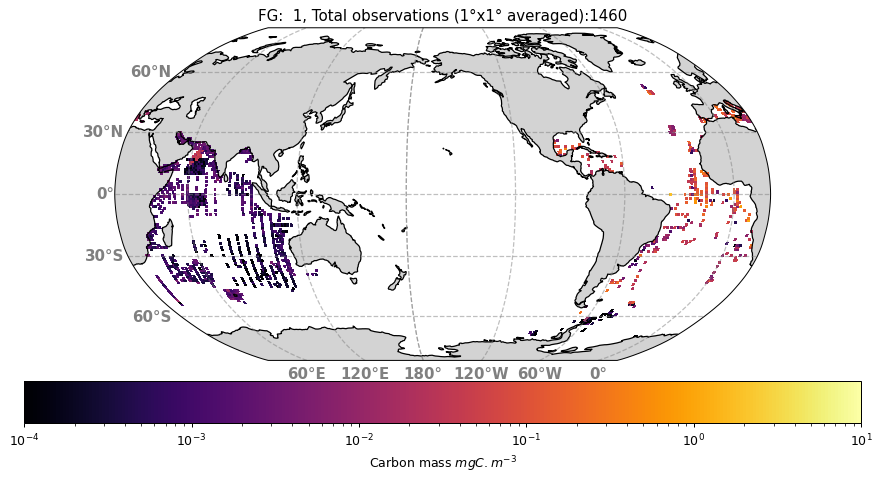

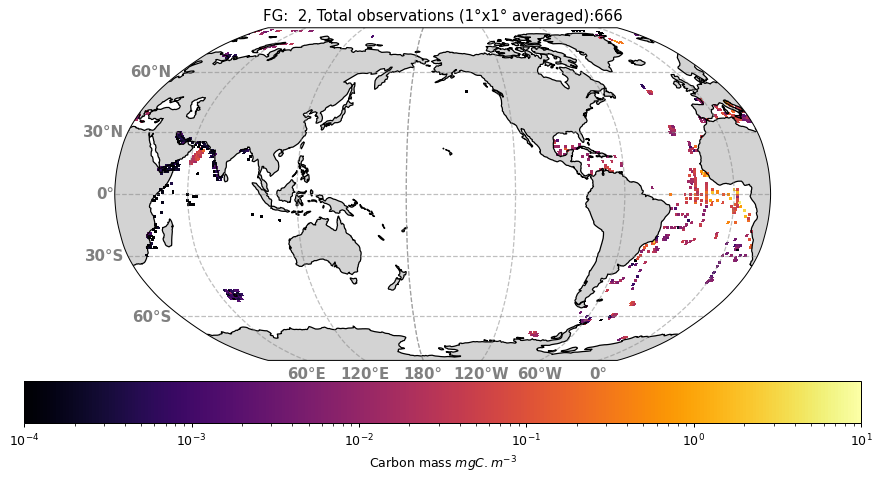

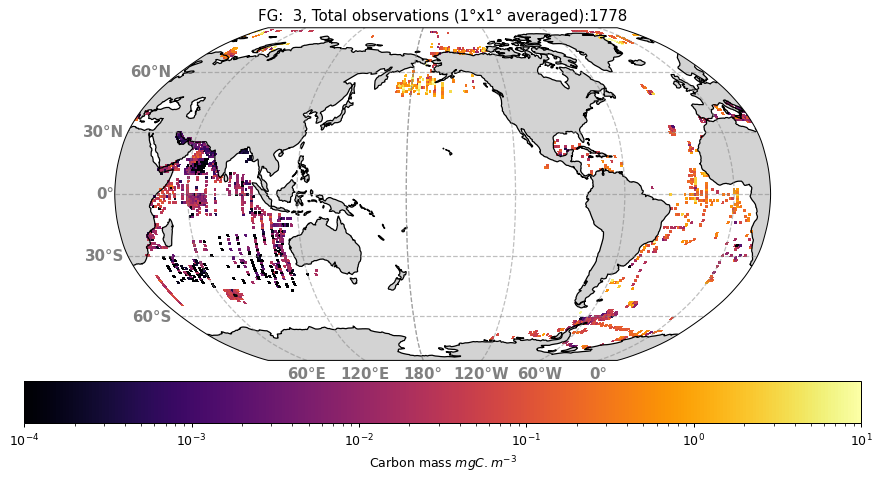

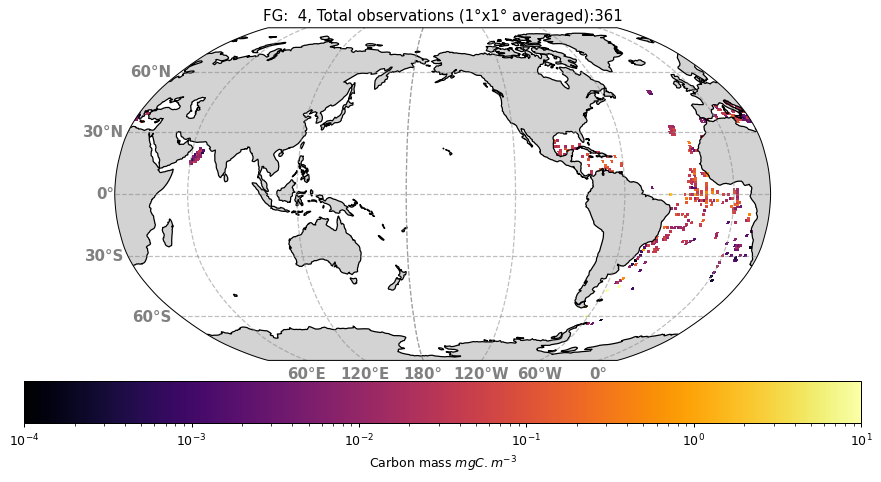

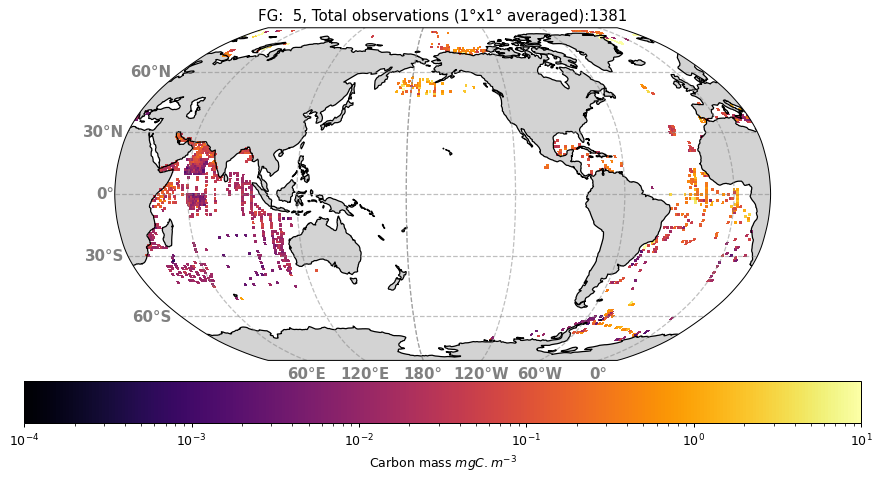

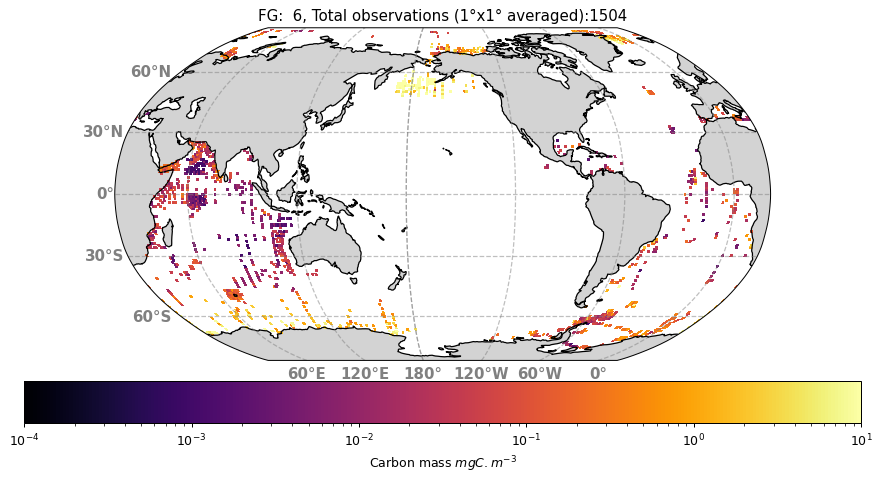

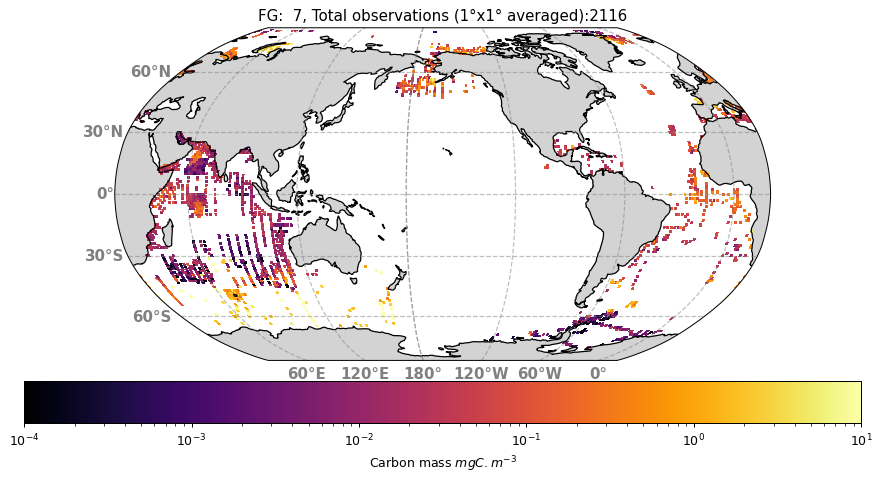

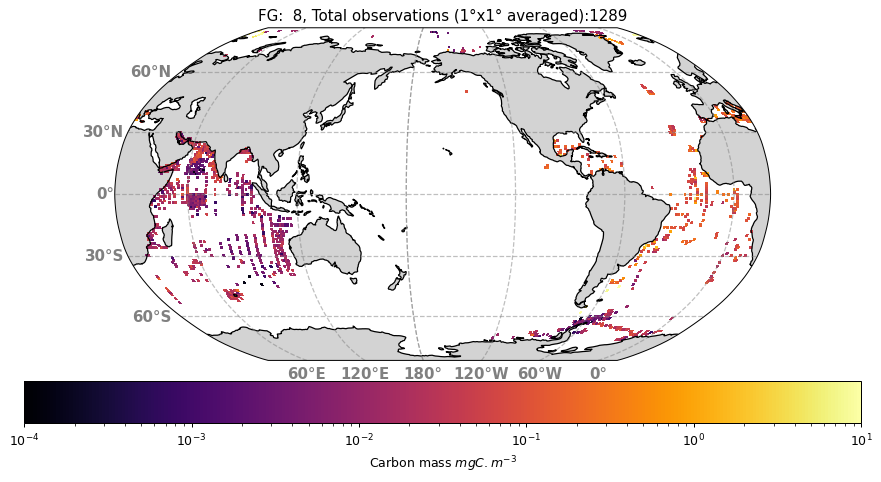

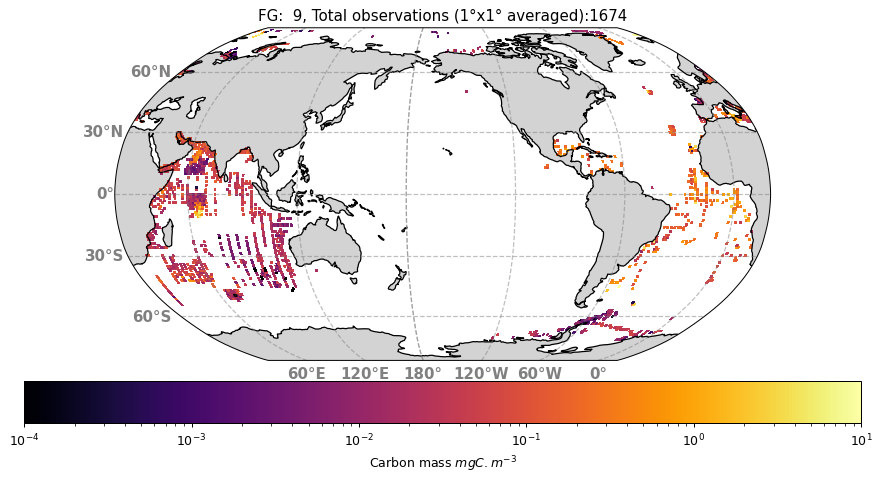

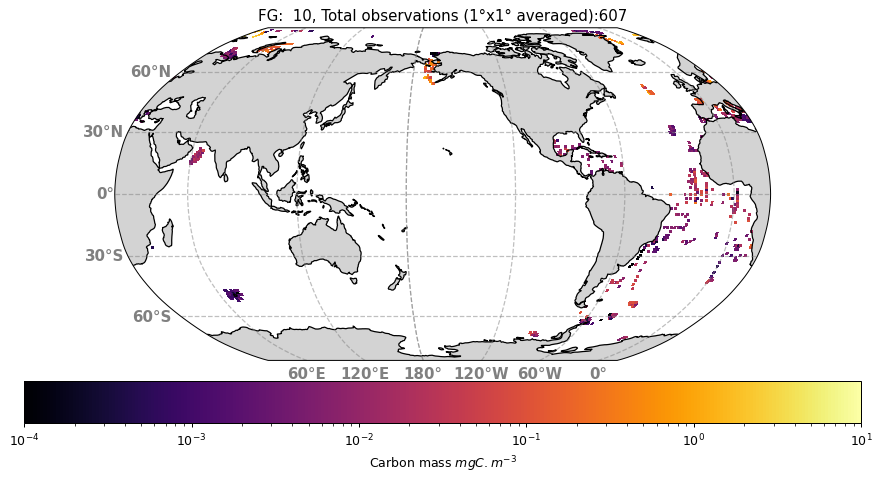

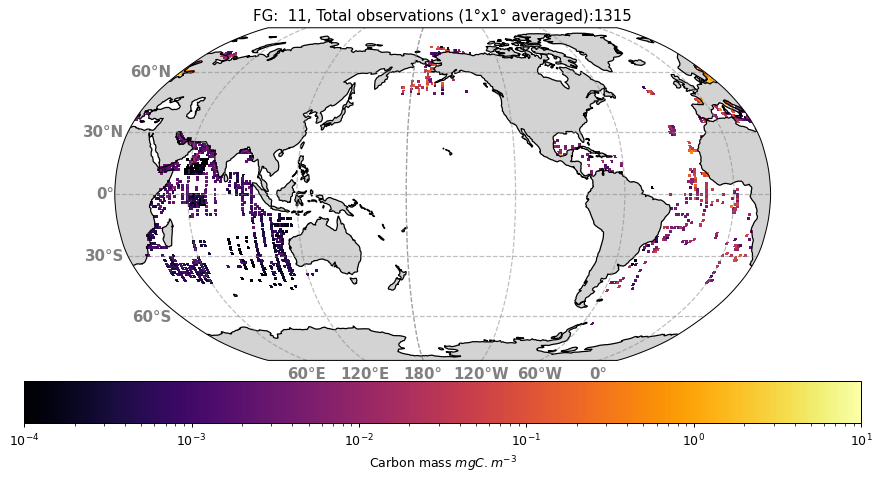

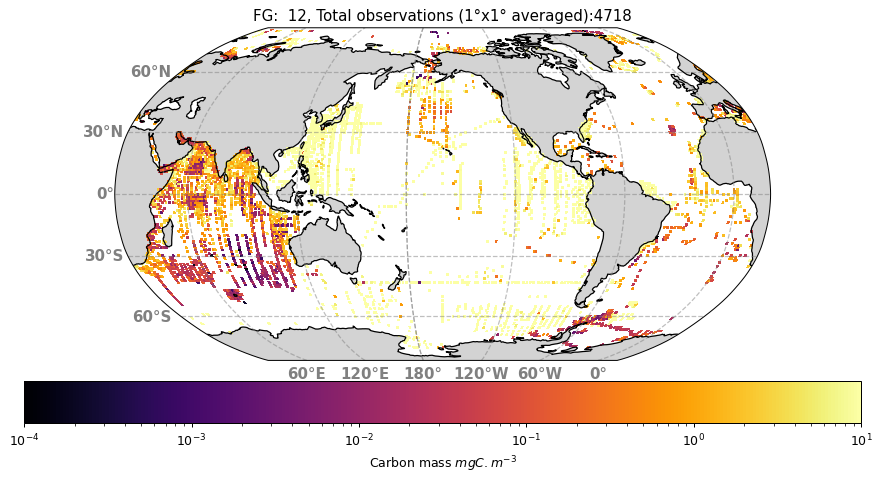

In [29]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import numpy as np
from matplotlib.colors import LogNorm

# Copier les données pour éviter de modifier les données originales
data = trait_data.copy()

# Arrondir les coordonnées à l'unité la plus proche
data['roundedLatitude'] = data['decimalLatitude'].round()
data['roundedLongitude'] = data['decimalLongitude'].round()

# Calculer la moyenne de MeasurementValue pour chaque WorMS_ID et chaque paire de coordonnées arrondies
grouped = data.groupby(['WoRMS_ID', 'roundedLatitude', 'roundedLongitude']).agg({'MeasurementValue': 'mean'}).reset_index()

# Trouver tous les WoRMS_ID uniques
worms_ids = grouped['WoRMS_ID'].unique()

# Créer des subplots pour chaque WorMS_ID avec une projection Robinson centrée sur -160 degrés (océan Pacifique)
for worms_id in worms_ids:
    plt.figure(figsize=(12, 6), dpi=90)
    ax = plt.axes(projection=ccrs.Robinson(central_longitude=-160))
    ax.set_global()
    ax.coastlines()
    ax.add_feature(cfeature.LAND, facecolor='lightgray')

    # Filtrer les données pour le WorMS_ID actuel
    subset = grouped[grouped['WoRMS_ID'] == worms_id]

    # Préparer les données pour pcolormesh
    lon = subset['roundedLongitude'].values
    lat = subset['roundedLatitude'].values
    z = subset['MeasurementValue'].values

    # Générer les bords des grilles pour pcolormesh
    lon_edges = np.arange(np.floor(lon.min()), np.ceil(lon.max()) + 2, 1) - 0.5
    lat_edges = np.arange(np.floor(lat.min()), np.ceil(lat.max()) + 2, 1) - 0.5

    # Création d'une grille pour les données Z
    Z = np.full((len(lat_edges)-1, len(lon_edges)-1), np.nan)
    for x, y, val in zip(lon, lat, z):
        xi = np.searchsorted(lon_edges - 0.5, x) - 1
        yi = np.searchsorted(lat_edges - 0.5, y) - 1
        if 0 <= xi < Z.shape[1] and 0 <= yi < Z.shape[0]:
            Z[yi, xi] = val

    # Tracer la grille de données avec pcolormesh
    mesh = ax.pcolormesh(lon_edges, lat_edges, Z, cmap='inferno', transform=ccrs.PlateCarree(),
                         norm=LogNorm(0.0001, vmax=10))

    # Ajouter une barre de couleur
    cbar = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
    cbar.set_label('Carbon mass $mgC.m^{-3}$')

    # Ajouter les lignes de grille principales
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}

    # Ajouter un titre
    plt.title(f'FG:  {int(worms_id)}, Total observations (1°x1° averaged):{len(subset)}')
    plt.savefig(f'/net/meso/work/svivier/AtlantECO/map_{worms_id}.pdf')

    # Montrer la carte
    plt.show()

In [30]:
trait_data.to_csv('/net/meso/work/svivier/Git/Data/FGs_biomass.csv', index=False)